# **Exploratory Data Analysis of LFW Dataset**

**This notebook incorporates the Labeled Faces in the Wild (LFW) dataset for exploratory data analysis and will help you perform a thorough exploratory data analysis on the LFW dataset.**



## 1. **Loading the Dataset**: 
   - **LFW Dataset**: Fetches the LFW dataset using `fetch_lfw_people` from `scikit-learn`, which includes images and labels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import cv2

# PART 1: Load and Display Image Data
print("PART 1: Load and Display Image Data")

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)


PART 1: Load and Display Image Data


In [2]:
# Extract image data and labels
images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

# 2. **Displaying Images**: 
   - **Sample Image**: Displays a sample image and its dimensions directly from the LFW dataset.

Number of images loaded: 1288
Number of different people: 7
Sample image shape: (50, 37)


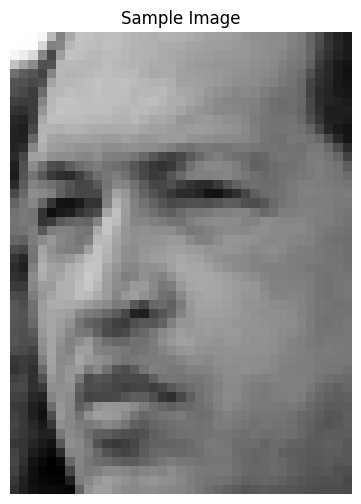

In [3]:
# Display the number of images and target names
print(f"Number of images loaded: {len(images)}")
print(f"Number of different people: {len(target_names)}")

# Display a sample image and its dimensions
sample_image = images[0]
print(f"Sample image shape: {sample_image.shape}")

plt.figure(figsize=(6, 6))
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Image")
plt.axis('off')
plt.show()

# 3. **Image Size Analysis**: 
   - **Statistics**: Computes and plots histograms for image heights and widths using the dataset.

In [4]:
# PART 3: Analyze Image Sizes
print("\nPART 3: Analyze Image Sizes")

# Extract height and width from image shapes
sizes = [img.shape[:2] for img in images]
sizes_df = pd.DataFrame(sizes, columns=['Height', 'Width'])

# Display basic statistics about image sizes
print("Image size statistics:")
print(sizes_df.describe())


PART 3: Analyze Image Sizes
Image size statistics:
       Height   Width
count  1288.0  1288.0
mean     50.0    37.0
std       0.0     0.0
min      50.0    37.0
25%      50.0    37.0
50%      50.0    37.0
75%      50.0    37.0
max      50.0    37.0


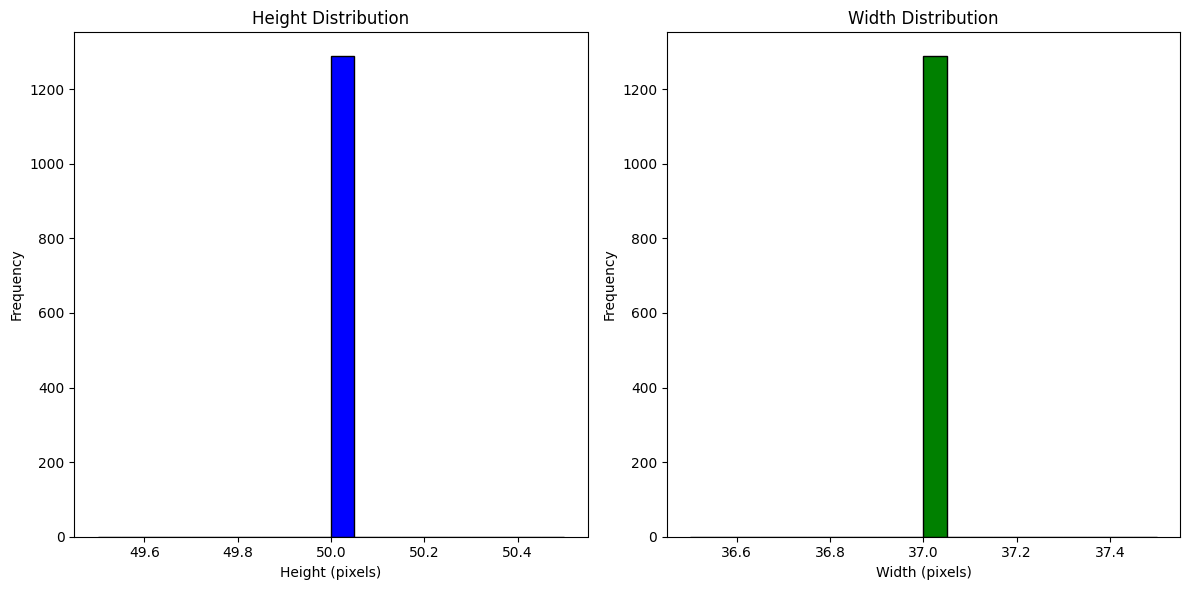

In [5]:
# Plot histograms for image height and width
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(sizes_df['Height'], bins=20, color='blue', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sizes_df['Width'], bins=20, color='green', edgecolor='black')
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4. **Color Distribution**: 
   - **Grayscale Images**: Since LFW images are grayscale, the function converts them to BGR format before calculating color distributions. However, since grayscale images have only one channel, the color distribution might not be as informative.


In [6]:
# PART 4: Analyze Image Color Distribution
print("\nPART 4: Analyze Image Color Distribution")

def get_color_distribution(image):
    """
    Compute the color distribution histogram of an image.
    
    Parameters:
    - image (numpy array): The image for which to compute the color distribution.
    
    Returns:
    - color_distribution (numpy array): The color distribution histogram.
    """
    # Convert grayscale image to BGR format for consistency
    image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    color_distribution = cv2.calcHist([image_bgr], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    return color_distribution

# Compute and plot color distribution for a sample image
sample_image = images[0]
color_dist = get_color_distribution(sample_image)



PART 4: Analyze Image Color Distribution


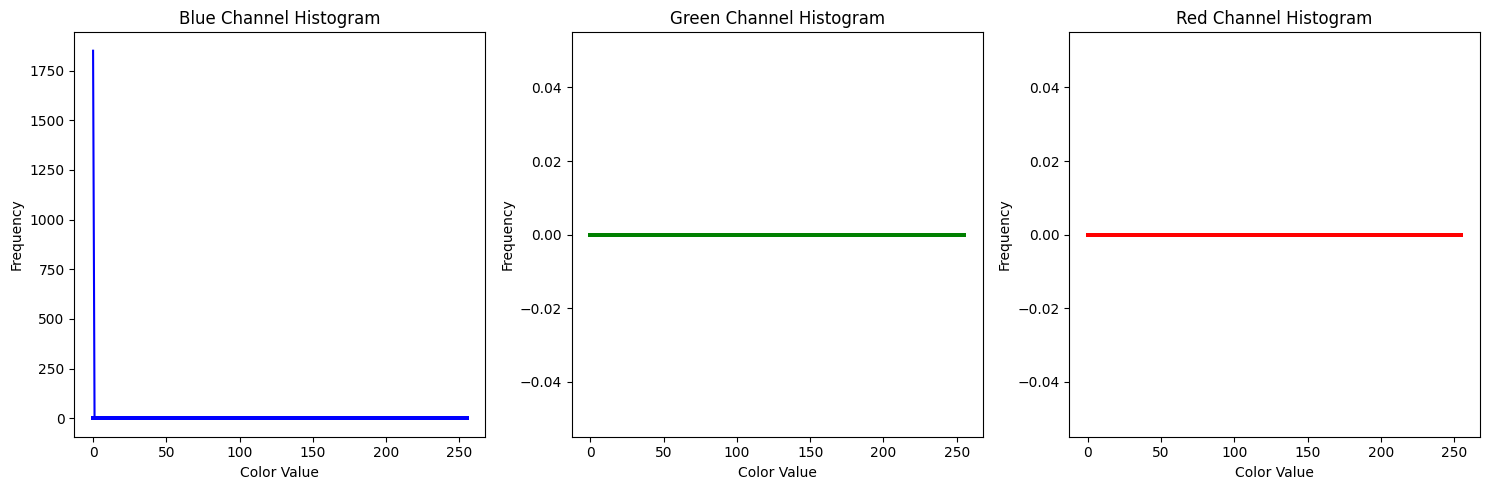

In [8]:
# Plot color distribution for each channel
plt.figure(figsize=(15, 5))

# Colors for plotting
colors = ['Blue', 'Green', 'Red']
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    plt.plot(color_dist[i], color=color.lower())
    plt.title(f'{color} Channel Histogram')
    plt.xlabel('Color Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 5. **Additional Analysis**: 
   - **Entropy Calculation**: Computes entropy for each image to measure information content and visualizes the entropy distribution.

In [9]:
# PART 5: Additional Image Analysis
print("\nPART 5: Additional Image Analysis")

# Function to compute image entropy
def compute_entropy(image):
    """
    Compute the entropy of an image, which measures the amount of information.
    
    Parameters:
    - image (numpy array): The image for which to compute the entropy.
    
    Returns:
    - entropy (float): The entropy value of the image.
    """
    image_gray = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Ensure image is in BGR format
    histogram = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
    histogram = histogram / histogram.sum()
    entropy = -np.sum(histogram * np.log2(histogram + np.finfo(float).eps))
    return entropy

# Compute entropy for a sample image
entropy = compute_entropy(sample_image)
print(f"Entropy of sample image: {entropy:.2f}")


PART 5: Additional Image Analysis
Entropy of sample image: -0.00


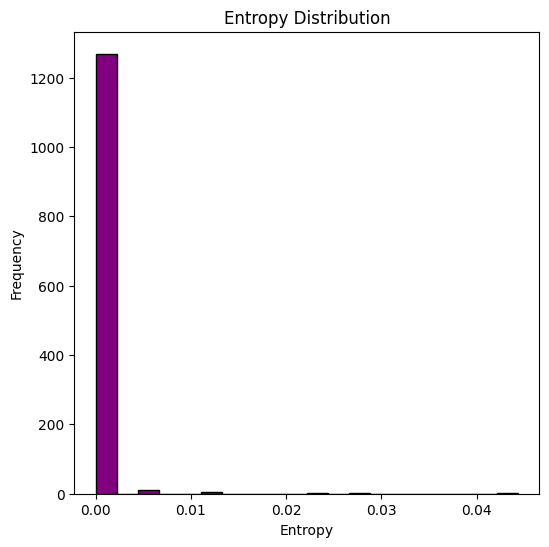

In [10]:
# Display the entropy histogram
plt.figure(figsize=(6, 6))
plt.hist([compute_entropy(img) for img in images], bins=20, color='purple', edgecolor='black')
plt.title('Entropy Distribution')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()

# 6. **Summary**: 
   - **Findings**: Provides a summary of key findings from the EDA, including dimensions, entropy values, and distribution statistics.

In [11]:
# PART 6: Summary of Findings
print("\nPART 6: Summary of Findings")

# Summarize findings from the EDA
print(f"Total number of images: {len(images)}")
print(f"Sample image dimensions (height x width): {sample_image.shape[0]} x {sample_image.shape[1]}")
print(f"Sample image entropy: {entropy:.2f}")

# Show a brief summary of size and color distribution
print("Size Distribution Summary:")
print(sizes_df.describe())

print("Color Distribution Summary:")
print("Color distribution of sample image plotted.")

print("Entropy Distribution Summary:")
print("Histogram of image entropy plotted.")


PART 6: Summary of Findings
Total number of images: 1288
Sample image dimensions (height x width): 50 x 37
Sample image entropy: -0.00
Size Distribution Summary:
       Height   Width
count  1288.0  1288.0
mean     50.0    37.0
std       0.0     0.0
min      50.0    37.0
25%      50.0    37.0
50%      50.0    37.0
75%      50.0    37.0
max      50.0    37.0
Color Distribution Summary:
Color distribution of sample image plotted.
Entropy Distribution Summary:
Histogram of image entropy plotted.
